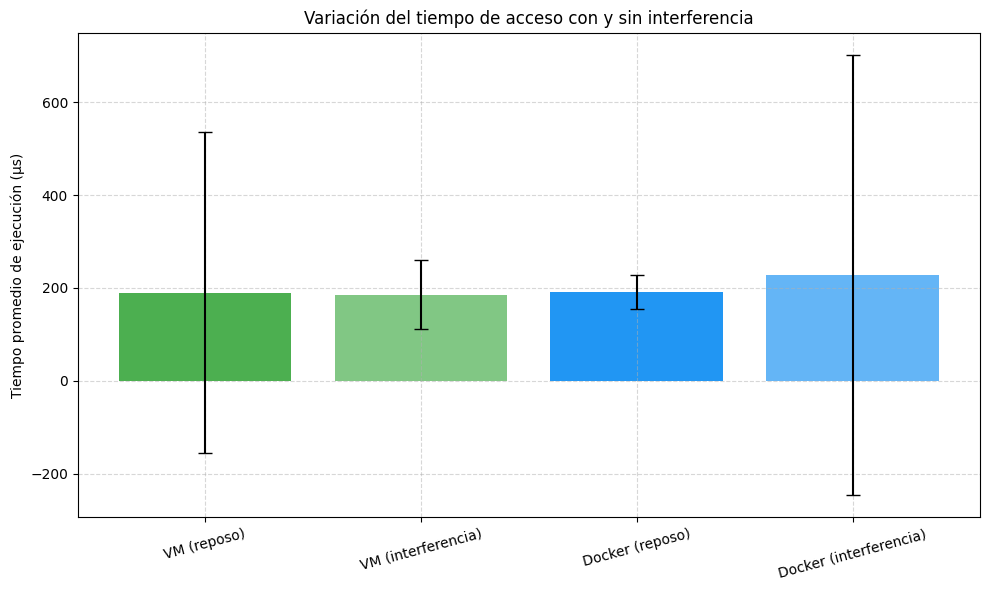

In [10]:
import matplotlib.pyplot as plt

def parse_result_file(path):
    with open(path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    if len(lines) < 2:
        raise ValueError(f"Archivo incompleto o mal formado: {path}")

    mean = float(lines[0].split(":")[1].strip().split()[0])
    stdev = float(lines[1].split(":")[1].strip().split()[0])
    return mean, stdev


# Rutas relativas al notebook
scenarios = {
    "VM (reposo)": "../results/vm_reposo.txt",
    "VM (interferencia)": "../results/vm_con_interferencia.txt",
    "Docker (reposo)": "../results/docker_reposo.txt",
    "Docker (interferencia)": "../results/docker_con_interferencia.txt"
}

means = []
stdevs = []
labels = []

# Leer resultados
for label, path in scenarios.items():
    mean, stdev = parse_result_file(path)
    labels.append(label)
    means.append(mean)
    stdevs.append(stdev)

# Visualización
x = range(len(labels))
plt.figure(figsize=(10, 6))
plt.bar(x, means, yerr=stdevs, capsize=5, color=["#4CAF50", "#81C784", "#2196F3", "#64B5F6"])
plt.xticks(x, labels, rotation=15)
plt.ylabel("Tiempo promedio de ejecución (µs)")
plt.title("Variación del tiempo de acceso con y sin interferencia")
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
